In [1]:
import cv2
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_hist(img):
  #import Opencv
  import cv2

  # import Numpy
  import numpy as np
  
  # read a image using imread
  img = cv2.imread(img,)
  ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
  # convert back to RGB color-space from YCrCb
  equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
  from google.colab.patches import cv2_imshow
  cv2_imshow(equalized_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [5]:
pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np 
import pandas as pd 
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/medical_data/trainLabels.csv",nrows=1000)
#data=pd.read_csv("")[:1000]

In [7]:
len(data)

1000

In [8]:
data.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [9]:
#adding .jpeg to each name of the image
data['image_name'] = [i+".jpeg" for i in data['image'].values]
data.head()

,image,level,image_name
0,10_left,0,10_left.jpeg
1,10_right,0,10_right.jpeg
2,13_left,0,13_left.jpeg
3,13_right,0,13_right.jpeg
4,15_left,1,15_left.jpeg


0    739
2    148
1     59
3     28
4     26
Name: level, dtype: int64

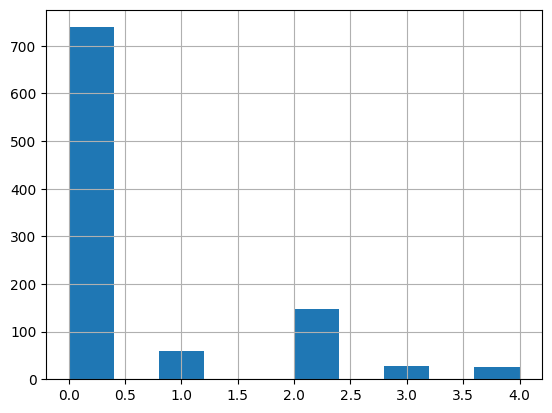

In [10]:
data['level'].hist()
data['level'].value_counts()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data[["image", "image_name"]]
y = data['level']#level is like output column

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train, test= train_test_split(data,test_size=0.2, random_state=42)

# Split the train data into train and validation sets
train,val= train_test_split(train,test_size=0.2, random_state=42)


In [14]:
train.shape, val.shape, test.shape

((640, 3), (160, 3), (200, 3))

In [15]:
train.head()

,image,level,image_name
390,446_left,0,446_left.jpeg
847,1032_right,2,1032_right.jpeg
93,100_right,0,100_right.jpeg
236,274_left,0,274_left.jpeg
858,1041_left,0,1041_left.jpeg


In [16]:
val.head()

,image,level,image_name
726,905_left,2,905_left.jpeg
138,167_left,0,167_left.jpeg
266,316_left,0,316_left.jpeg
765,940_right,0,940_right.jpeg
798,978_left,1,978_left.jpeg


In [17]:
test.head()

,image,level,image_name
521,634_right,0,634_right.jpeg
737,914_right,0,914_right.jpeg
740,917_left,0,917_left.jpeg
660,803_left,0,803_left.jpeg
411,467_right,0,467_right.jpeg


In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
#Adding Gausian image
import cv2
def load_ben_color(image):
    IMG_SIZE = 224
    sigmaX=10
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    return image

(683, 1024, 3)
Effect of Gausian Blurring


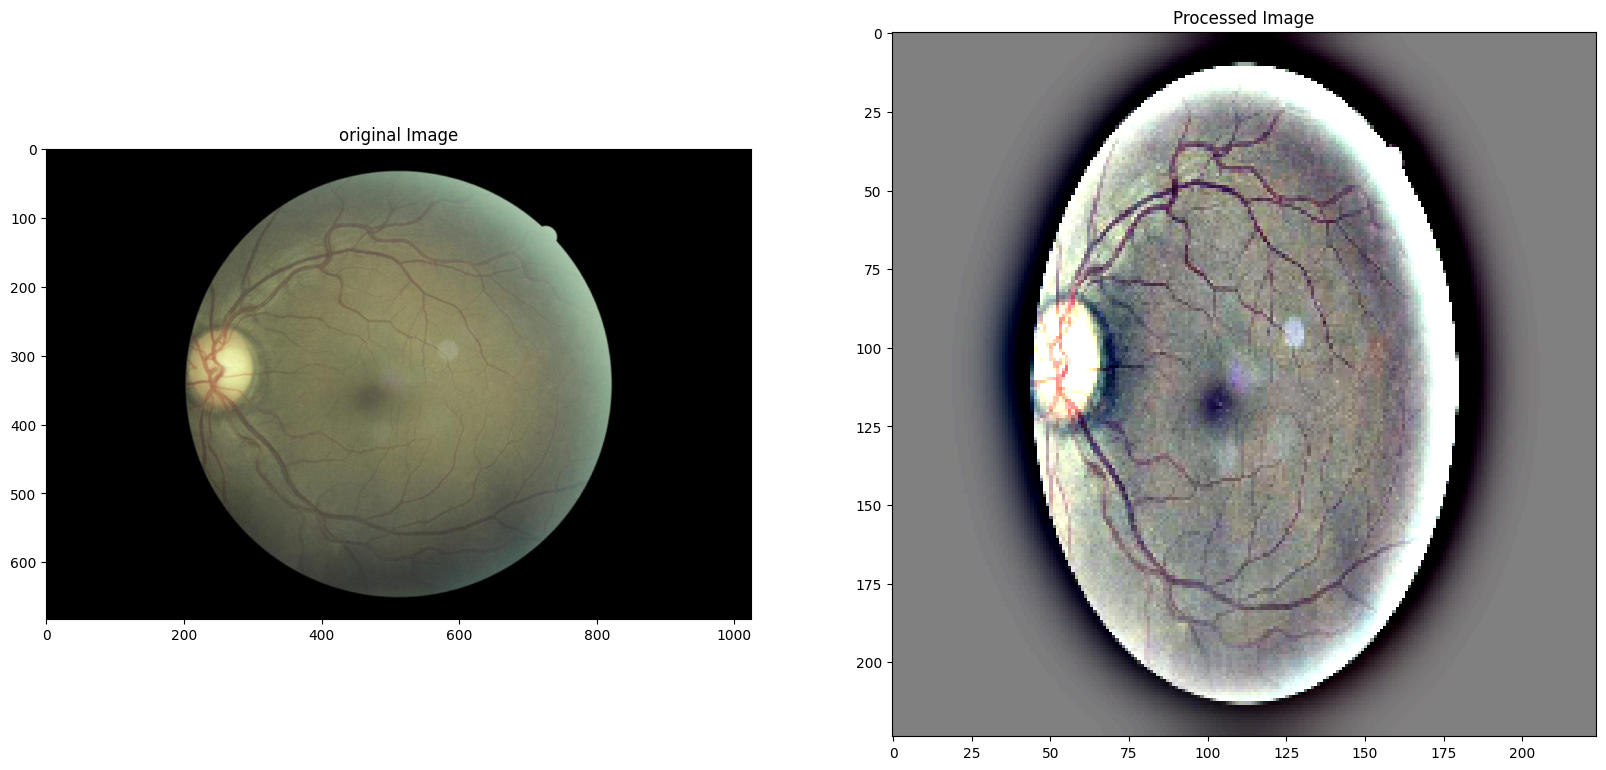

In [21]:
original_image_1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg',)
plt.figure(figsize=(20, 20))
original_image_1 = cv2.cvtColor(original_image_1, cv2.COLOR_BGR2RGB)
plt.subplot(121)
print(original_image_1.shape)
plt.title("original Image")
plt.imshow(original_image_1)

processed_image_1=load_ben_color(original_image_1)


plt.subplot(122)
plt.title("Processed Image")
plt.imshow(processed_image_1, cmap='gray')
print("Effect of Gausian Blurring")
plt.show()




In [26]:
def load_hist_meth(img):
    # Converting image to YCrCb color space
    ycrcb_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    
    # Selecting only the Y channel (luminance) and converting it to grayscale
    y_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2GRAY)
    
    # Perform histogram equalization on Y channel
    y_img = cv2.equalizeHist(y_img)
    
    # Converting back to 3-channel image
    equalized_img = cv2.cvtColor(y_img, cv2.COLOR_GRAY2RGB)
    
    return equalized_img


In [27]:
data_gen = ImageDataGenerator(rescale=1/255.,
                              zoom_range=0.15,
                              fill_mode='constant',
                              cval=0.,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=load_ben_color)

In [28]:
train_path="/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/"

In [29]:
# batch size
bs = 10

train['level'] = train['level'].astype(str)
val['level'] = val['level'].astype(str)
test['level'] = test['level'].astype(str)

train_gen = data_gen.flow_from_dataframe(train, 
                                         train_path,
                                         x_col="image_name", y_col="level", class_mode="categorical",
                                         batch_size=bs,
                                         target_size=(224, 224),
                                          shuffle=True)
val_gen = data_gen.flow_from_dataframe(val,
                                       train_path,
                                       x_col="image_name", y_col="level", class_mode="categorical",
                                       batch_size=bs,
                                       target_size=(224, 224),
                                        shuffle=True)
test_gen = data_gen.flow_from_dataframe(test,
                                       train_path,
                                       x_col="image_name", y_col="level", class_mode="categorical",
                                       batch_size=bs,
                                       target_size=(224, 224),
                                        shuffle=True)



Found 640 validated image filenames belonging to 5 classes.
Found 160 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.


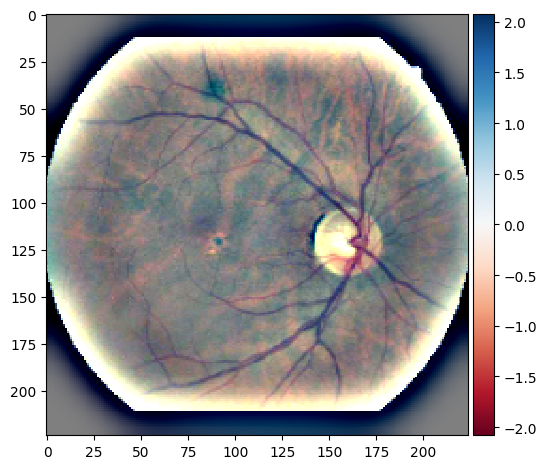

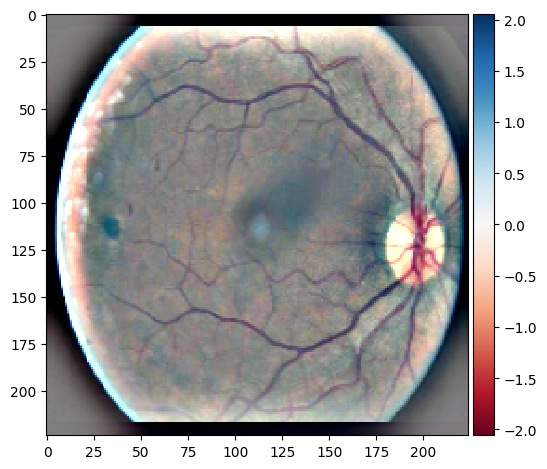

In [30]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

x1, y1 = train_gen[0]
x2, y2 = val_gen[0]
imshow(x1[0])
imshow(x2[0])

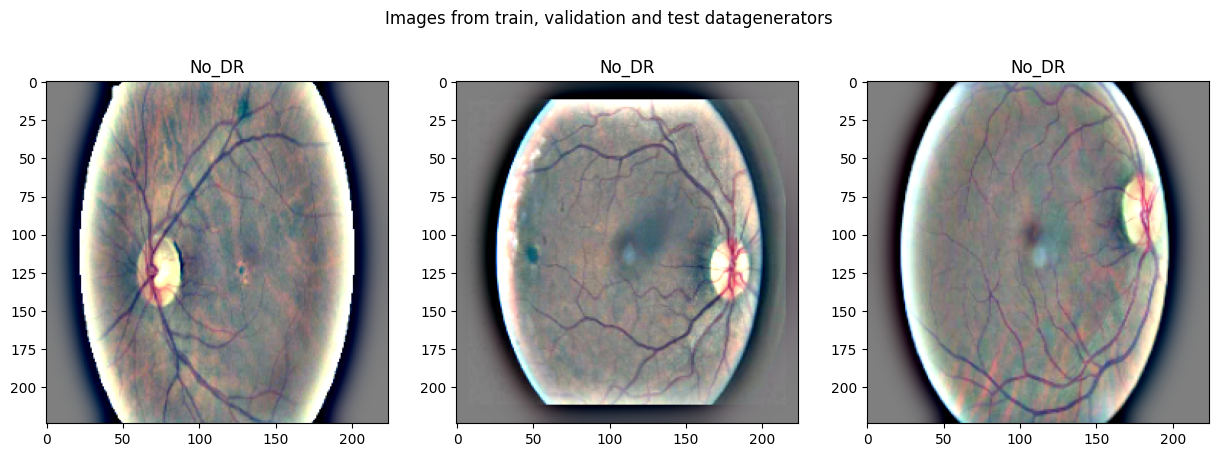

In [31]:
import matplotlib.pyplot as plt
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

x1, y1 = train_gen[0]
x2, y2 = val_gen[0]
x3, y3 = test_gen[0]
class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR']

# Create a figure and axis object
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Display the images
ax[0].imshow(x1[0])
ax[0].set_title(class_names[np.argmax(y1)])
ax[1].imshow(x2[0])
ax[1].set_title(class_names[np.argmax(y2)])
ax[2].imshow(x3[0])
ax[2].set_title(class_names[np.argmax(y3)])

# Add a title to the plot
fig.suptitle('Images from train, validation and test datagenerators');

# Show the plot
plt.show()


#CNN


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# create the model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(5, activation='softmax'))



In [38]:
# compile the model
import  keras.optimizers
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_cnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [40]:
# train the model
history_cnn=model_cnn.fit(train_gen, steps_per_epoch=train_gen.n // bs, epochs=10, validation_data=val_gen, validation_steps=val_gen.n // bs)

Epoch 1/10
64/64 [==============================] - 32s 471ms/step - loss: 0.9811 - accuracy: 0.7141 - val_loss: 0.7982 - val_accuracy: 0.7625
Epoch 2/10
64/64 [==============================] - 22s 348ms/step - loss: 0.9508 - accuracy: 0.7250 - val_loss: 0.8464 - val_accuracy: 0.7625
Epoch 3/10
64/64 [==============================] - 21s 333ms/step - loss: 0.9433 - accuracy: 0.7250 - val_loss: 0.8159 - val_accuracy: 0.7625
Epoch 4/10
64/64 [==============================] - 22s 349ms/step - loss: 0.9331 - accuracy: 0.7250 - val_loss: 0.8877 - val_accuracy: 0.7625
Epoch 5/10
64/64 [==============================] - 21s 327ms/step - loss: 0.9210 - accuracy: 0.7250 - val_loss: 0.7933 - val_accuracy: 0.7625
Epoch 6/10
64/64 [==============================] - 22s 349ms/step - loss: 0.9333 - accuracy: 0.7250 - val_loss: 0.8243 - val_accuracy: 0.7625
Epoch 7/10
64/64 [==============================] - 22s 347ms/step - loss: 0.9079 - accuracy: 0.7250 - val_loss: 0.8080 - val_accuracy: 0.7625

In [41]:
import matplotlib.pyplot as plt

# evaluate the model
loss, acc = model_cnn.evaluate(test_gen, steps=test_gen.n // bs, verbose=1)
print(f"Test accuracy: {acc * 100:.2f}%")

20/20 [==============================] - 6s 297ms/step - loss: 0.8127 - accuracy: 0.7650
Test accuracy: 76.50%


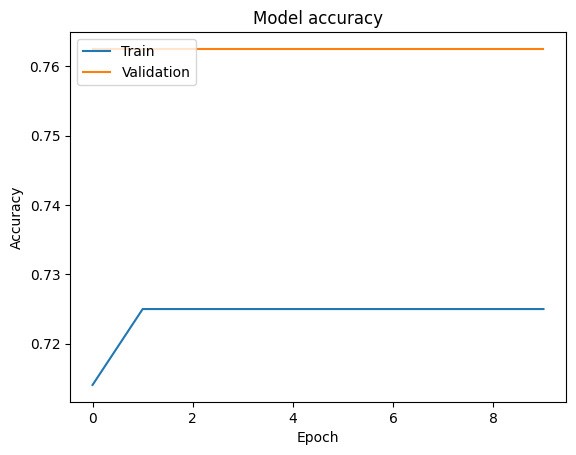

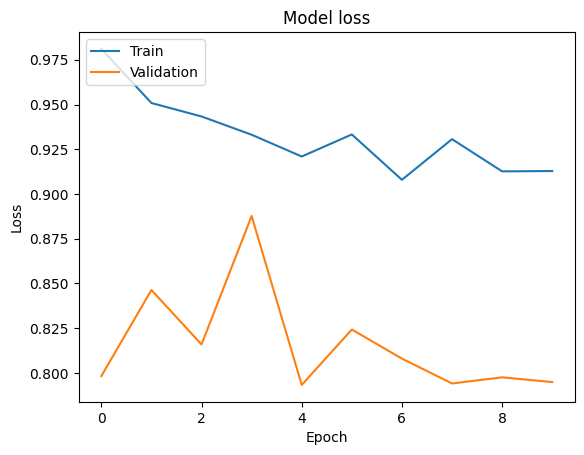

In [42]:

# Plot the training and validation accuracy and loss curves
import matplotlib.pyplot as plt

# Plot the training and validation accuracy curves
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#VGG-16

In [43]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load pre-trained VGG16 model without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for classification
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

# Define the model
model_vgg2 = Model(inputs=base_model.input, outputs=x)


58889256/58889256 [==============================] - 0s 0us/step


In [44]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model_vgg2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Train the model using the train_gen and val_gen generators
history_vgg2 = model_vgg2.fit(train_gen, validation_data=val_gen, epochs=10, steps_per_epoch=len(train_gen), validation_steps=len(val_gen))


Epoch 1/10
64/64 [==============================] - 25s 382ms/step - loss: 2.5212 - accuracy: 0.5750 - val_loss: 0.8464 - val_accuracy: 0.7625
Epoch 2/10
64/64 [==============================] - 28s 438ms/step - loss: 1.2072 - accuracy: 0.6469 - val_loss: 1.0736 - val_accuracy: 0.7625
Epoch 3/10
64/64 [==============================] - 24s 369ms/step - loss: 1.0862 - accuracy: 0.6984 - val_loss: 0.9384 - val_accuracy: 0.7625
Epoch 4/10
64/64 [==============================] - 28s 437ms/step - loss: 1.1117 - accuracy: 0.6984 - val_loss: 0.9466 - val_accuracy: 0.7625
Epoch 5/10
64/64 [==============================] - 26s 403ms/step - loss: 1.0677 - accuracy: 0.7234 - val_loss: 1.0994 - val_accuracy: 0.7625
Epoch 6/10
64/64 [==============================] - 23s 357ms/step - loss: 1.0539 - accuracy: 0.7109 - val_loss: 0.9134 - val_accuracy: 0.7625
Epoch 7/10
64/64 [==============================] - 23s 360ms/step - loss: 1.1616 - accuracy: 0.7188 - val_loss: 0.9934 - val_accuracy: 0.7625

In [48]:
# Print the accuracy and loss metrics
test_loss, test_acc = model_vgg2.evaluate(test_gen, steps=len(test_gen))
print("test accuracy:", test_acc)

20/20 [==============================] - 8s 394ms/step - loss: 0.9199 - accuracy: 0.7650
test accuracy: 0.7649999856948853


In [49]:
'''train_loss, train_acc = model_vgg2.evaluate(train_gen, steps=len(train_gen))
val_loss, val_acc = model_vgg2.evaluate(val_gen, steps=len(val_gen))
print("Training loss:", train_loss)
print("Training accuracy:", train_acc)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)'''

'train_loss, train_acc = model_vgg2.evaluate(train_gen, steps=len(train_gen))\nval_loss, val_acc = model_vgg2.evaluate(val_gen, steps=len(val_gen))\nprint("Training loss:", train_loss)\nprint("Training accuracy:", train_acc)\nprint("Validation loss:", val_loss)\nprint("Validation accuracy:", val_acc)'

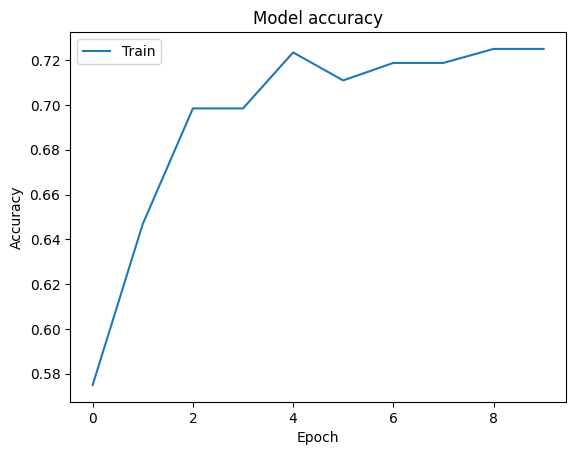

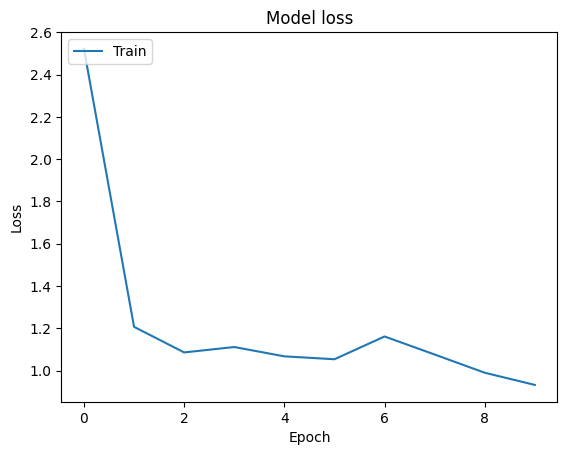

In [50]:
# Plot the training and validation accuracy and loss curves
import matplotlib.pyplot as plt

# Plot the training and validation accuracy curves
plt.plot(history_vgg2.history['accuracy'])
#plt.plot(history_vgg2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history_vgg2.history['loss'])
#plt.plot(history_vgg2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#PREDICTION

In [51]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/" + val.iloc[3].image_name)
im = np.array(im.resize((224, )*2, resample=Image.LANCZOS))
im.shape

(224, 224, 3)

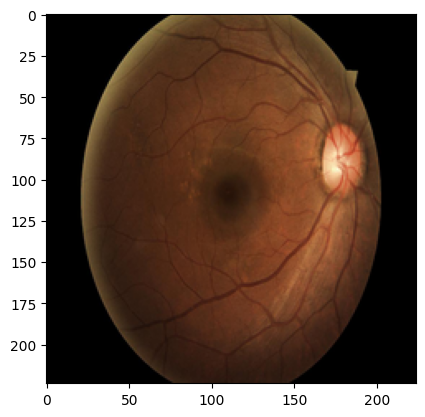

In [52]:
import matplotlib.pyplot as plt
plt.imshow(im)

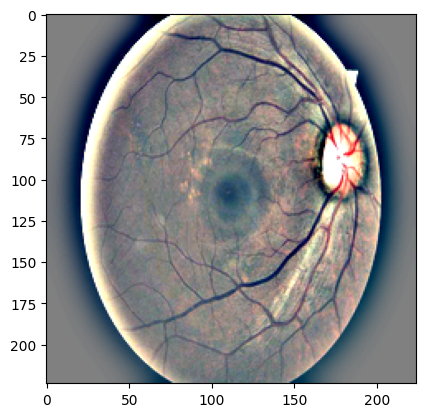

In [53]:
plt.imshow(load_ben_color(im))

In [54]:
print("predicted:", np.argmax(model_vgg2.predict(load_ben_color(im).reshape(1, *im.shape))[0]))
print("actual:", val.iloc[3].level)

1/1 [==============================] - 1s 795ms/step
predicted: 0
actual: 0


1/1 [==============================] - 0s 258ms/step
Predicted class: 0
Actual class: 0


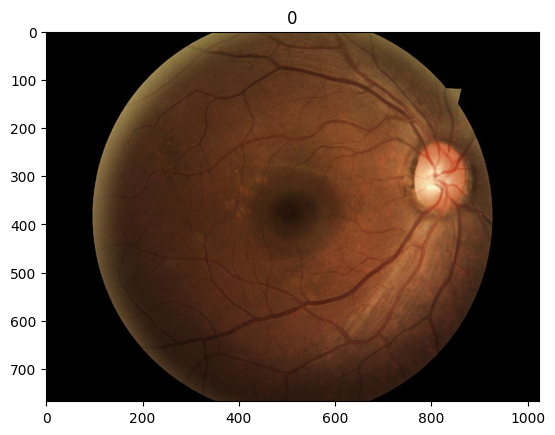

In [55]:
# import necessary libraries
import cv2
import numpy as np
from keras.models import load_model

# define the path to your saved model
#model_path = "/path/to/your/saved/model.h5"

# load the model
#model = load_model(model_path)

# define the preprocessing function
def load_ben_color(image):
    IMG_SIZE = 224
    sigmaX=10
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    return image

# load your input image
img_path = "/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/"+ val.iloc[3].image_name
input_img = cv2.imread(img_path)

# preprocess the image using load_ben_color function
preprocessed_img = load_ben_color(input_img)

# expand the dimensions of the image to match the input shape of the model
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)

# make a prediction using the model
prediction = model_cnn.predict(preprocessed_img)

# get the predicted class label
predicted_class = np.argmax(prediction)

# print the predicted class label and the input image
print("Predicted class:", predicted_class)
#imshow(input_img)


plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title(predicted_class)
plt.axis("on")
print("Actual class:" ,val.iloc[3].level)

1/1 [==============================] - 0s 20ms/step


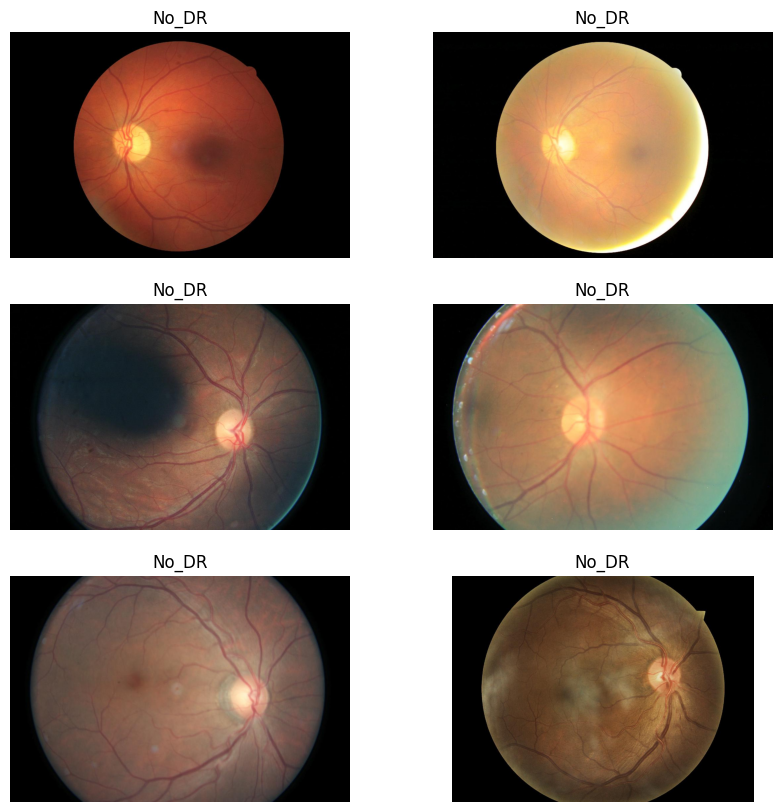

In [59]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define the path to the directory containing the images
path = '/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/'

# Define a list of class names for prediction
class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR']

# Define a function to load and preprocess the image
def load_and_preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Preprocess the image using the `load_ben_color` function
    image = load_ben_color(image)
    # Expand the dimensions of the image to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    # Normalize the pixel values of the image
    image = image / 255.0
    # Return the preprocessed image
    return image

# Define a list to store the paths of the selected images
image_paths = []

# Select 15 random images from the directory
for i in range(6):
    # Get a random file name from the directory
    file_name = random.choice(os.listdir(path))
    # Join the file name with the directory path to get the full file path
    image_path = os.path.join(path, file_name)
    # Append the image path to the list
    image_paths.append(image_path)

# Create a subplot with 5 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

# Loop through the list of image paths and plot each image along with the predicted class
for i, image_path in enumerate(image_paths):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    # Get the predicted class from the model
    predictions = model_vgg2.predict(image)
    predicted_class = class_names[np.argmax(predictions)]
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Plot the image with the predicted class as the title
    row = i // 2
    col = i % 2
    axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(predicted_class)
    axes[row, col].axis('off')

# Show the plot
plt.show()



#EfficientNetB0

In [60]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Build the model
base_model_enb = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = base_model_enb.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model_enb = Model(inputs=base_model_enb.input, outputs=predictions)



16705208/16705208 [==============================] - 0s 0us/step


In [61]:
# Compile the model
model_enb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Train the model
history_enb = model_enb.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
64/64 [==============================] - 37s 574ms/step - loss: 0.9741 - accuracy: 0.7000 - val_loss: 1.2275 - val_accuracy: 0.7375
Epoch 2/10
64/64 [==============================] - 24s 383ms/step - loss: 0.9505 - accuracy: 0.7219 - val_loss: 1.1165 - val_accuracy: 0.7563
Epoch 3/10
64/64 [==============================] - 24s 374ms/step - loss: 0.8818 - accuracy: 0.7219 - val_loss: 1.0239 - val_accuracy: 0.7625
Epoch 4/10
64/64 [==============================] - 25s 391ms/step - loss: 0.8598 - accuracy: 0.7328 - val_loss: 1.2137 - val_accuracy: 0.6687
Epoch 5/10
64/64 [==============================] - 23s 360ms/step - loss: 0.8451 - accuracy: 0.7328 - val_loss: 3.6175 - val_accuracy: 0.0437
Epoch 6/10
64/64 [==============================] - 25s 389ms/step - loss: 0.8306 - accuracy: 0.7266 - val_loss: 1.0677 - val_accuracy: 0.7625
Epoch 7/10
64/64 [==============================] - 25s 384ms/step - loss: 0.7726 - accuracy: 0.7422 - val_loss: 1.2550 - val_accuracy: 0.3625

In [65]:
# Evaluate the model on test data
test_loss, test_acc = model_enb.evaluate(test_gen)
print(f'Test accuracy: {test_acc}')

20/20 [==============================] - 8s 379ms/step - loss: 7.4160 - accuracy: 0.7250
Test accuracy: 0.7250000238418579


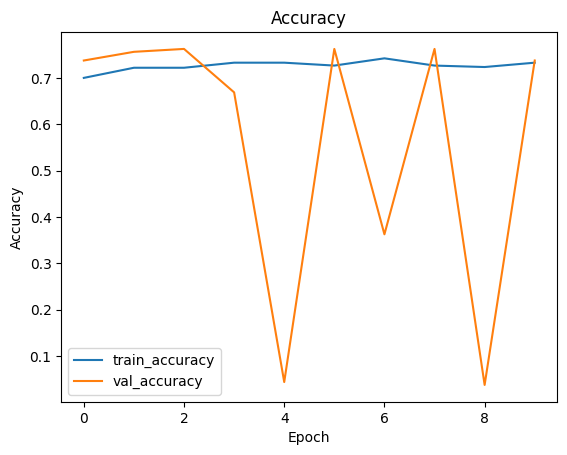

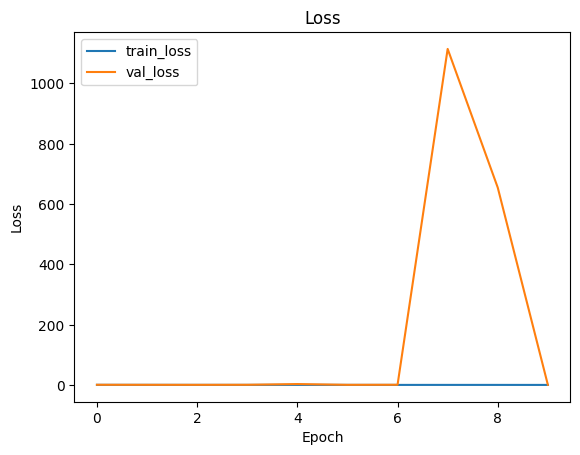

In [66]:

# plot accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history_enb.history['accuracy'], label='train_accuracy')
plt.plot(history_enb.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_enb.history['loss'], label='train_loss')
plt.plot(history_enb.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Resnet50

In [67]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# load ResNet50 model without the top layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# add custom top layers
x = base_model_resnet.output
x = Flatten()(x)
#x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# create final model
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)

# freeze ResNet50 layers
for layer in base_model_resnet.layers:
    layer.trainable = False

# compile model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [68]:
# train model
history_resnet = model_resnet.fit(train_gen, validation_data=val_gen, epochs=7,steps_per_epoch = len(train) // bs,validation_steps = len(val) // bs)


Epoch 1/7
64/64 [==============================] - 31s 378ms/step - loss: 7.5876 - accuracy: 0.5422 - val_loss: 2.9120 - val_accuracy: 0.5562
Epoch 2/7
64/64 [==============================] - 22s 348ms/step - loss: 1.7487 - accuracy: 0.6219 - val_loss: 1.3385 - val_accuracy: 0.3812
Epoch 3/7
64/64 [==============================] - 23s 364ms/step - loss: 1.2471 - accuracy: 0.6531 - val_loss: 0.9273 - val_accuracy: 0.7563
Epoch 4/7
64/64 [==============================] - 23s 367ms/step - loss: 1.0705 - accuracy: 0.7000 - val_loss: 0.9343 - val_accuracy: 0.7500
Epoch 5/7
64/64 [==============================] - 23s 365ms/step - loss: 1.0321 - accuracy: 0.7016 - val_loss: 1.0066 - val_accuracy: 0.7625
Epoch 6/7
64/64 [==============================] - 24s 371ms/step - loss: 1.0584 - accuracy: 0.7203 - val_loss: 0.8766 - val_accuracy: 0.7437
Epoch 7/7
64/64 [==============================] - 23s 367ms/step - loss: 0.9898 - accuracy: 0.7156 - val_loss: 0.8403 - val_accuracy: 0.7625


In [70]:

# evaluate model on test data
score = model_resnet.evaluate(test_gen)
print('Test accuracy:', score[1])


20/20 [==============================] - 6s 278ms/step - loss: 0.8493 - accuracy: 0.7650
Test accuracy: 0.7649999856948853


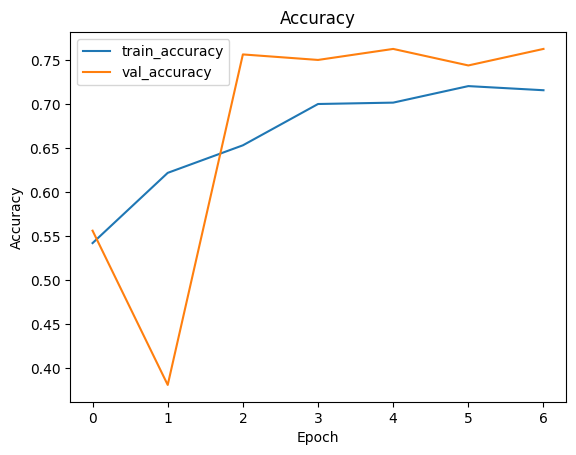

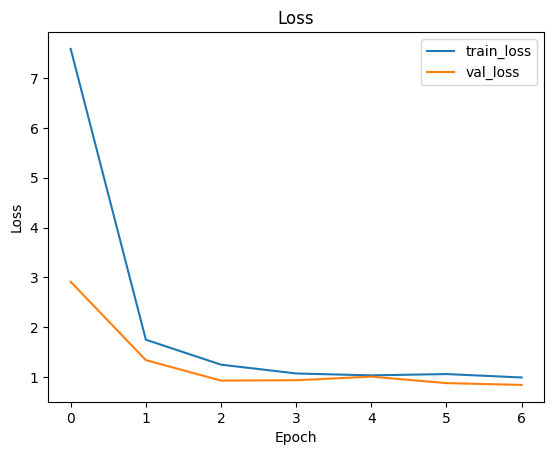

In [71]:

# plot accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history_resnet.history['accuracy'], label='train_accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_resnet.history['loss'], label='train_loss')
plt.plot(history_resnet.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


<table style="width:*500*%; font-size: 30px" >
  <tr style = "height: 500px">
    <th>Model</th>
    <th>Test Accuracy</th>
    <th>Validation Accuracy</th>
    <th>Time taken</th>
  </tr>
  <tr>
    <td>CNN</td>
    <td>76.5%</td>
    <td>76.25%</td>
    <td>384s</td>
  </tr>
  <tr>
      <td>VGG16</td>
      <td>76.4%</td>
      <td>76.2%</td>
      <td>251s</td>
  </tr>
  <tr>
   <td>Efficient80</td>
   <td>41.4%</td>
   <td>44.1%</td>
   <td>258s</td>
   </tr>
   <tr>
    <td>ResNet50</td>
    <td>76.5%</td>
    <td>76.2%</td>
    <td>240s</td>
    </tr>
</table>

<table style="width:200%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th>
    <th>Validation Accuracy</th>
  </tr>
  <tr>
    <td>CNN</td>
    <td>76.5%</td>
    <td>76.25%</td>
  </tr>
  <tr>
      <td>VGG16</td>
      <td>76.4%</td>
      <td>76.2%</td>
  </tr>
  <tr>
   <td>EfficientB0</td>
   <td>41.4%</td>
   <td>44.1%</td>
   </tr>
   <tr>
    <td>ResNet50</td>
    <td>76.5%</td>
    <td>76.2%</td>
    </tr>
</table>

In [ ]:
# Import the necessary libraries
import pandas as pd
import IPython.display as display
from PIL import Image

# Define the names of the images and their corresponding paths on Google Drive
image_names = ['image0.jpg','image1.jpg', 'image2.jpg', 'image3.jpg','image4.jpg','image1.jpg5']
image_paths = ['/content/drive/MyDrive/Colab Notebooks/medical_filter_images/image0.png', 
               '/content/drive/MyDrive/Colab Notebooks/medical_filter_images/image1.png', 
               '/content/drive/MyDrive/Colab Notebooks/medical_filter_images/image2.png',
               '/content/drive/MyDrive/Colab Notebooks/medical_filter_images/image3.png',
               '/content/drive/MyDrive/Colab Notebooks/medical_filter_images/image4.png',
               '/content/drive/MyDrive/Colab Notebooks/medical_filter_images/image5.png']

# Create a DataFrame with the names and image URLs
df = pd.DataFrame({'Name': image_names, 'Image': image_paths})

# Create a function to display the image in the table
def display_image(img_url):
    img = Image.open(img_url)
    display.display(display.Image(data=img.tobytes(), format='jpeg', width=150, height=150))

# Use the apply function to display the images in the table
df['Image'].apply(lambda x: display_image(x))
